![ga4](https://www.google-analytics.com/collect?v=2&tid=G-6VDTYWLKX6&cid=1&en=page_view&sid=1&dl=statmike%2Fvertex-ai-mlops%2FApplied+GenAI&dt=Vertex+AI+GenAI+For+Document+Q%26A+v3.ipynb)
<!--- header table --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20GenAI/Vertex%20AI%20GenAI%20For%20Document%20Q%26A%20v3.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A//raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Applied%20GenAI/Vertex%20AI%20GenAI%20For%20Document%20Q%26A%20v3.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20GenAI/Vertex%20AI%20GenAI%20For%20Document%20Q%26A%20v3.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https%3A//raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Applied%20GenAI/Vertex%20AI%20GenAI%20For%20Document%20Q%26A%20v3.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</table>

# Document Q&A

A complete workflow that shows how to:
- Parse and Chunk Documents with [Document AI](https://cloud.google.com/document-ai/docs/overview)
- Create Embeddings for Chunks with Vertex AI [PaLM API](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#palm-models)
- Do vector similarity searches with embeddings
- Build a local Q&A bot that leverage LLMs - Vertex AI [Gemini API](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#gemini-models) and [PaLM API](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#palm-models)

**What?**

Ask questions of the rules for MLB and get answers with specific references to official rules.

**Sources:**

The official MLB rules are at [this link](https://www.mlb.com/official-information).  This is a 192 page PDF document.

**Tools:**

- Vertex AI [PaLM API](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#palm-models) for LLM and Text Embeddings
  - `vertexai.language_models.TextEmbeddingModel.from_pretrained('textembedding-gecko')`
  - `vertexai.language_models.TextEmbeddingModel.from_pretrained('text-bison-32k')`
- Vertex AI [Gemini API](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#gemini-models) For LLM
  - `vertexai.generative_models.GenerativeModel('gemini-1.0-pro')`
- Input file processing into documents/elements with GCP [Document AI](https://cloud.google.com/document-ai/docs/overview)
  - `google.cloud.documentai.DocumentProcessorServiceClient()`

---

**Google Cloud Vertex AI Generative AI Support**

Vertex AI Generative AI gives access to Google's large generative AI models and also enables you to test, tune, augment, distill, and deploy them for your applications. Get an overview [here](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview).

---

**How:**

- Parse documents: In this case the official MLB rules
- Create chunks from the source information.
  - <u>Definition</u>: a chunk is a section of the rules
- Create embeddings for each chunk
- Ask a question
  - Create an embedding of the question
  - Use vector similarity to retrieve embeddings for related chunks
  - Retrieve the chunkss associated with returned embeddings
  - Prepare a prompt to answer the question using the chunkss as context
- Present the response as an answer with links to the related chunks (sections of the document).

**What is Unique?**

An LLM is likely unexposed to a users private content.  This appoach constructs a summarization prompt for an LLM by first retriving context for the question from the users documents using embeddings similarity search - also called retrieval augmented generation (RAG).  This also allows the response to be accompanied by direct reference to the users documentation used in the prompt.

**Notes**

- An LLM is likely trained on many sources that probably include lots of general knowledge, even information like what is used here.  It is also likely knowledgable of past, outdated information which can be a benefit - or detriment - to accuracy.  This approach directly uses the version of the document that currently applies.

**Prerequisites**

This notebook uses Vertex AI and Document AI services for processing data while also using Google Cloud Storage And Google BigQuery for data storage and retrieval.  If you are running this notebook from Colab or another environment where your user id is authenticated then your account will need roles/permissions that allow working with these services.  If you are running this from a Vertex AI Workbench Notebook instance then it is running as a service account which will need the roles/permission that allow working with these services.  

**References**

- [Vertex AI GenAI Studio](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview)
    - This repository: [Applied GenAI](https://github.com/statmike/vertex-ai-mlops/tree/main/Applied%20GenAI)
    - Vertex AI [Python Client](https://cloud.google.com/python/docs/reference/aiplatform/latest/vertexai)
- [Document AI](https://cloud.google.com/document-ai/docs/overview)
    - This repository: [Working With Document AI](https://github.com/statmike/vertex-ai-mlops/tree/main/Working%20With/Document%20AI)
    - Document AI [Parsers](https://cloud.google.com/document-ai/docs/processors-list)
    - Document AI [Python Client](https://cloud.google.com/python/docs/reference/documentai/latest)

---
## Overview

<p><center>
    <img alt="Overview Chart" src="../architectures/notebooks/applied/genai/doc_qa.png" width="55%">
</center><p>


---
## Colab Setup

When running this notebook in [Colab](https://colab.google/) or [Colab Enterprise](https://cloud.google.com/colab/docs/introduction), this section will authenticate to GCP (follow prompts in the popup) and set the current project for the session.

In [1]:
PROJECT_ID = 'statmike-mlops-349915' # replace with project ID

In [2]:
try:
    from google.colab import auth
    auth.authenticate_user()
    !gcloud config set project {PROJECT_ID}
except Exception:
    pass

---
## Installs and API Enablement

The clients packages may need installing in this environment. 

### Installs (If Needed)

In [1]:
# tuples of (import name, install name, min_version)
packages = [
    ('google.cloud.aiplatform', 'google-cloud-aiplatform'),
    ('google.cloud.documentai', 'google-cloud-documentai'),
    ('google.cloud.storage', 'google-cloud-storage'),
    ('google.cloud.bigquery', 'google-cloud-bigquery'),
    ('PIL', 'Pillow'),
    ('PyPDF2', 'PyPDF2'), 
    ('seaborn', 'seaborn'), 
    ('matplotlib', 'matplotlib'), 
    ('sklearn', 'scikit-learn'),
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user
    elif len(package) == 3:
        if importlib.metadata.version(package[0]) < package[2]:
            print(f'updating package {package[1]}')
            install = True
            !pip install {package[1]} -U -q --user

### API Enablement

In [2]:
!gcloud services enable aiplatform.googleapis.com
!gcloud services enable documentai.googleapis.com

### Restart Kernel (If Installs Occured)

After a kernel restart the code submission can start with the next cell after this one.

In [3]:
if install:
    import IPython
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

---
## Setup

Inputs

In [4]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [5]:
REGION = 'us-central1'
EXPERIMENT = 'mlb-rules'
SERIES = 'applied-genai-v3'

# save results in: GCS, BQ, ALL
SAVE_IN = 'ALL'
# retrieve results from: GCS, BQ.  If not present then it will run parsing and embedding.
RETRIEVE_FROM = 'GCS'

# make this the gcs bucket for storing files
GCS_BUCKET = PROJECT_ID 

# make this the BQ Project / Dataset / Table prefix to store results
BQ_PROJECT = PROJECT_ID
BQ_DATASET = SERIES.replace('-', '_')
BQ_TABLE = EXPERIMENT
BQ_REGION = REGION[0:2]

# location for the source documents (PDF): can be http:// or gs://, a list of one or more document links
source_documents = ['https://img.mlbstatic.com/mlb-images/image/upload/mlb/wqn5ah4c3qtivwx3jatm.pdf']

# If a prior run is available then:
# a value of True will trigger loading it from RETRIEVE_FROM,
# a value of False will trigger removing (if exist) from all possible sources.  This forces a regeneration when needed.
USE_PRIOR_RUN = True

# first question to ask
question = "How is baseball played?"

Packages

In [6]:
import os
import io
import json
import base64
import requests
import concurrent.futures
import time
import asyncio

import PyPDF2
import IPython
import PIL, PIL.ImageFont, PIL.Image, PIL.ImageDraw
import shapely

import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

import vertexai.language_models # PaLM and Codey Models
import vertexai.generative_models # for Gemini Models
from google.cloud import documentai
from google.cloud import storage
from google.cloud import bigquery
from google.api_core import retry

Clients

In [7]:
# vertex ai clients
vertexai.init(project = PROJECT_ID, location = REGION)

# document AI client
LOCATION = REGION.split('-')[0]
docai_client = documentai.DocumentProcessorServiceClient(
    client_options = dict(api_endpoint = f"{LOCATION}-documentai.googleapis.com")
)
docai_async_client = documentai.DocumentProcessorServiceAsyncClient(
    client_options = dict(api_endpoint = f"{LOCATION}-documentai.googleapis.com")
)

# bigquery client
bq = bigquery.Client(project = PROJECT_ID)

# gcs client: assumes bucket already exists
gcs = storage.Client(project = PROJECT_ID)
bucket = gcs.bucket(GCS_BUCKET)

---
## Vertex LLM Setup

> For a detailed overview of all the genative AI models and their APIs check out the companion notebook: [Getting Started - Vertex AI GenAI Python Client](./Getting%20Started%20-%20Vertex%20AI%20GenAI%20Python%20Client.ipynb)

With the [vertexai](https://cloud.google.com/python/docs/reference/aiplatform/latest/vertexai) client there are packages for the types of data being interacted with.  There is also a higher package for preview models (not yet in GA).

> **NOTE:** In can be helpful to review the API Documentation at it's source in GitHub for up to the moment release information: [github/googleapis/python-aiplatform](https://github.com/googleapis/python-aiplatform/tree/main)

Gemini Text and Multimodal Models:
- [vertexai.generative_models()](https://cloud.google.com/python/docs/reference/aiplatform/latest/vertexai.generative_models)
    - [vertexai.preview.generative_models()](https://cloud.google.com/python/docs/reference/aiplatform/latest/vertexai.preview.generative_models)

Language Models (PaLM and Codey Models):
- [vertexai.language_models()](https://cloud.google.com/python/docs/reference/aiplatform/latest/vertexai.language_models)
    - [vertexai.preview.language_models()](https://cloud.google.com/python/docs/reference/aiplatform/latest/vertexai.preview.language_models)

In [8]:
# Gemini Models
gemini_text = vertexai.generative_models.GenerativeModel("gemini-1.0-pro")

# PaLM Models
textembed_model = vertexai.language_models.TextEmbeddingModel.from_pretrained('textembedding-gecko')
text_model_b = vertexai.language_models.TextGenerationModel.from_pretrained('text-bison')
text_model_b32 = vertexai.language_models.TextGenerationModel.from_pretrained('text-bison-32k')
text_model_u = vertexai.language_models.TextGenerationModel.from_pretrained('text-unicorn')

### Prompt

In [9]:
question

'How is baseball played?'

### Embeddings

In [10]:
textembed_model.get_embeddings([question])[0].values[0:5]

[0.02588232420384884,
 -0.03225235641002655,
 -0.01948062889277935,
 0.01719886064529419,
 -0.002375800861045718]

### Generation: PaLM `text-bison`

In [11]:
response = text_model_b.predict(question)
response

 **Objective:**
The objective of baseball is to score runs by hitting the ball and advancing around the bases. The team with the most runs at the end of the game wins.

**Gameplay:**
- A baseball game is played between two teams, each with nine players on the field.
- The game is divided into nine innings, each consisting of two halves: the top of the inning when the visiting team bats, and the bottom of the inning when the home team bats.
- Each team takes turns batting and fielding. The batting team tries to hit the ball into fair territory (between the foul lines) and advance around

In [12]:
response.safety_attributes

{'Derogatory': 0.1, 'Insult': 0.1, 'Sexual': 0.1}

In [13]:
response = text_model_b.predict(question, max_output_tokens = 500)
response

 **Objective:**
The objective of baseball is to score runs by hitting the ball and advancing around the bases. The team with the most runs at the end of the game wins.

**Gameplay:**
- A baseball game is played between two teams, each with nine players on the field.
- The game is divided into nine innings, each consisting of two halves: the top of the inning when the visiting team bats, and the bottom of the inning when the home team bats.
- Each team takes turns batting and fielding. The batting team tries to hit the ball into fair territory (between the foul lines) and advance around the bases. The fielding team tries to prevent the batters from reaching base and to get them out.

**Basic Rules:**
- A player can advance around the bases by hitting the ball and reaching first base, or by being awarded a walk (four balls outside the strike zone).
- A player can also advance around the bases by stealing a base (running to the next base while the pitcher is delivering the ball).
- A play

In [14]:
IPython.display.Markdown(response.text)

 **Objective:**
The objective of baseball is to score runs by hitting the ball and advancing around the bases. The team with the most runs at the end of the game wins.

**Gameplay:**
- A baseball game is played between two teams, each with nine players on the field.
- The game is divided into nine innings, each consisting of two halves: the top of the inning when the visiting team bats, and the bottom of the inning when the home team bats.
- Each team takes turns batting and fielding. The batting team tries to hit the ball into fair territory (between the foul lines) and advance around the bases. The fielding team tries to prevent the batters from reaching base and to get them out.

**Basic Rules:**
- A player can advance around the bases by hitting the ball and reaching first base, or by being awarded a walk (four balls outside the strike zone).
- A player can also advance around the bases by stealing a base (running to the next base while the pitcher is delivering the ball).
- A player is out if they hit the ball into foul territory, strike out (swing and miss three times), are tagged out (touched with the ball by a fielder), or are forced out (a fielder catches a batted ball and throws it to first base before the runner can reach it).
- A run is scored when a player advances all the way around the bases and returns to home plate.

**Scoring:**
- A single is awarded when a batter hits the ball and reaches first base safely.
- A double is awarded when a batter hits the ball and reaches second base safely.
- A triple is awarded when a batter hits the ball and reaches third base safely.
- A home run is awarded when a batter hits the ball over the outfield fence and circles all the bases safely.

**Game Duration:**
- A baseball game typically lasts around three hours.
- If the score is tied after nine innings, the game goes into extra innings until one team scores a run.

### Generation: PaLM `text-unicorn`

In [15]:
response = text_model_u.predict(question)
response

Baseball is a bat-and-ball game played between two teams of nine players each. The game is played on a field with four bases arranged in a diamond shape. The objective of the game is to score runs by hitting the ball and running around the bases.

The game begins with one team batting and the other team fielding. The pitcher throws the ball to the batter, who tries to hit it with the bat. If the batter hits the ball, they run to first base. If they reach first base safely, they can continue running to second, third, and home base. If they reach home base, they score

In [16]:
IPython.display.Markdown(response.text)

Baseball is a bat-and-ball game played between two teams of nine players each. The game is played on a field with four bases arranged in a diamond shape. The objective of the game is to score runs by hitting the ball and running around the bases.

The game begins with one team batting and the other team fielding. The pitcher throws the ball to the batter, who tries to hit it with the bat. If the batter hits the ball, they run to first base. If they reach first base safely, they can continue running to second, third, and home base. If they reach home base, they score

### Generation: PaLM `text-bison-32k`

In [17]:
response = text_model_b32.predict(question)
response

 **Objective:**
The objective of baseball is to score runs by hitting the ball and advancing around the bases. The team with the most runs at the end of the game wins.

**Gameplay:**
- A baseball game is played between two teams, each with nine players on the field.
- The game is divided into nine innings, each consisting of two halves: the top of the inning when the visiting team bats, and the bottom of the inning when the home team bats.
- Each team takes turns batting and fielding. The batting team tries to hit the ball into fair territory (between the foul lines) and advance around

In [18]:
IPython.display.Markdown(response.text)

 **Objective:**
The objective of baseball is to score runs by hitting the ball and advancing around the bases. The team with the most runs at the end of the game wins.

**Gameplay:**
- A baseball game is played between two teams, each with nine players on the field.
- The game is divided into nine innings, each consisting of two halves: the top of the inning when the visiting team bats, and the bottom of the inning when the home team bats.
- Each team takes turns batting and fielding. The batting team tries to hit the ball into fair territory (between the foul lines) and advance around

### Generation: Gemini `gemini-1.0-pro`

In [19]:
response = gemini_text.generate_content(question)
response

candidates {
  content {
    role: "model"
    parts {
      text: "**The Basics:**\n\n* Baseball is a team sport played between two teams of nine players each.\n* The game is played on a baseball diamond, composed of four bases: home plate, first base, second base, and third base.\n* The objective of the game is to score more runs than the opposing team by hitting the ball and running around the bases.\n\n**Gameplay:**\n\n1. **Inning:** A baseball game consists of nine innings. In each inning, each team gets a chance to bat and a chance to field.\n2. **Batting:** One team takes turns batting while the other team fields. The batter stands at home plate and tries to hit the ball thrown by the pitcher.\n3. **Pitching:** The pitcher stands on the pitcher\'s mound and throws the ball towards the batter. The pitcher aims to get the batter out by throwing strikes (balls that cross the home plate in the strike zone) or having the batter hit the ball into the field.\n4. **Fielding:** The field

In [20]:
print(response.text)

**The Basics:**

* Baseball is a team sport played between two teams of nine players each.
* The game is played on a baseball diamond, composed of four bases: home plate, first base, second base, and third base.
* The objective of the game is to score more runs than the opposing team by hitting the ball and running around the bases.

**Gameplay:**

1. **Inning:** A baseball game consists of nine innings. In each inning, each team gets a chance to bat and a chance to field.
2. **Batting:** One team takes turns batting while the other team fields. The batter stands at home plate and tries to hit the ball thrown by the pitcher.
3. **Pitching:** The pitcher stands on the pitcher's mound and throws the ball towards the batter. The pitcher aims to get the batter out by throwing strikes (balls that cross the home plate in the strike zone) or having the batter hit the ball into the field.
4. **Fielding:** The fielding team tries to catch the ball hit by the batter and prevent the batter from r

In [21]:
IPython.display.Markdown(response.text)

**The Basics:**

* Baseball is a team sport played between two teams of nine players each.
* The game is played on a baseball diamond, composed of four bases: home plate, first base, second base, and third base.
* The objective of the game is to score more runs than the opposing team by hitting the ball and running around the bases.

**Gameplay:**

1. **Inning:** A baseball game consists of nine innings. In each inning, each team gets a chance to bat and a chance to field.
2. **Batting:** One team takes turns batting while the other team fields. The batter stands at home plate and tries to hit the ball thrown by the pitcher.
3. **Pitching:** The pitcher stands on the pitcher's mound and throws the ball towards the batter. The pitcher aims to get the batter out by throwing strikes (balls that cross the home plate in the strike zone) or having the batter hit the ball into the field.
4. **Fielding:** The fielding team tries to catch the ball hit by the batter and prevent the batter from reaching base. If the fielder catches the ball before it hits the ground, the batter is out.
5. **Running the Bases:** If the batter hits the ball into the field, they try to run around the bases without being tagged or thrown out. Each base that the batter safely reaches scores a run for their team.

**Outs:**

* A batter can be out in several ways:
    * **Strikeout:** The batter fails to hit three strikes.
    * **Catch:** A fielder catches the ball hit by the batter before it hits the ground.
    * **Force Out:** A batter is forced out if a runner already on base must advance to the next base to avoid being out.
    * **Tag Out:** A batter is tagged out if a fielder tags them with the ball while they are not on a base.

**Runs:**

* A run is scored when a batter safely reaches home plate after touching all the bases in order.

**Winning:**

* The team with the most runs at the end of nine innings wins the game.

---
## Retrieve Files From Previous Run on GCS Or BigQuery

This uses the input parameter set above: `RETRIEVE_FROM`.  If it is set to `BQ` or `GCS` then it will check the source for an available prior run and retrieve it if it exists.


Function to check for existance of BigQuery Table:

In [22]:
def bq_table_check(table):
    from google.cloud.exceptions import NotFound
    try:
        bq.get_table(table)
        return True
    except NotFound:
        return False
    
bq_table_check(f'{BQ_DATASET}.{BQ_TABLE}_files_pages'), bq_table_check(f'{BQ_DATASET}.{BQ_TABLE}_files_pages_chunks')

(True, True)

In [23]:
if USE_PRIOR_RUN == False:
    PRIOR_PARSE = False
    
    # do a check for prior run and present message if found letting user know the prior result exists but not being used
    if RETRIEVE_FROM == 'GCS' and len(list(bucket.list_blobs(prefix = f'{SERIES}/{EXPERIMENT}/files_pages.json'))) > 0:
        print(f'Previous results exists in GCS but forcing the creation of new parsing with USE_PRIOR_RUN = {USE_PRIOR_RUN}')
    elif RETRIEVE_FROM == 'BQ' and bq_table_check(f'{BQ_DATASET}.{BQ_TABLE}_files_pages'):
        print(f'Previous results exists in BQ but forcing the creation of new parsing with USE_PRIOR_RUN = {USE_PRIOR_RUN}')

elif RETRIEVE_FROM == 'GCS' and len(list(bucket.list_blobs(prefix = f'{SERIES}/{EXPERIMENT}/files_pages.json'))) > 0:
    print('Importing previous run from GCS')

    # load files_pages: the file+page level information including docai responses in `parsing`
    blob = bucket.blob(f'{SERIES}/{EXPERIMENT}/files_pages.json')
    files_pages = [json.loads(line) for line in blob.download_as_text().splitlines()]
    
    # load files_pages_chunks: the chunks parsed from the files+pages
    blob = bucket.blob(f'{SERIES}/{EXPERIMENT}/files_pages_chunks.json')
    files_pages_chunks = [json.loads(line) for line in blob.download_as_text().splitlines()]   
    
    # Set Indicator to prevent redoing the parsing later in this notebook
    PRIOR_PARSE = True

elif RETRIEVE_FROM == 'BQ' and bq_table_check(f'{BQ_DATASET}.{BQ_TABLE}_files_pages'):
    print('Importing previous run from BigQuery')

    # load files_pages: the file+page level information including docai responses in `parsing`
    files_pages = bq.query(f'SELECT * FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_files_pages` ORDER BY file_index, page_index').to_dataframe().to_dict('records')
    # convert json string to dictionary:
    for page in files_pages:
        page['parsing'] = json.loads(page['parsing'])
    
    # load files_pages_chunks: the chunks parsed from the files+pages
    files_pages_chunks = bq.query(f'SELECT * FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_files_pages_chunks`').to_dataframe().to_dict('records')
    #convert json string to dictionary:
    for chunk in files_pages_chunks:
        chunk['metadata'] = json.loads(chunk['metadata'])
    # sort chunk by file, page, chunk number:
    files_pages_chunks = sorted(files_pages_chunks, key = lambda x: (x['metadata']['file_index'], x['metadata']['page_index'], x['metadata']['chunk']))

    # Set Indicator to prevent redoing the parsing later in this notebook
    PRIOR_PARSE = True
        
else:
    print('No previous run available to import')
    PRIOR_PARSE = False

Importing previous run from GCS


---
## Get/Create Document AI Processors

Document AI is comprised of multiple processors.  In this case the Form parser is used for its ability to detect and extract tables as well as OCR.  For a more thorough review of Document AI processors, including customized parsers, see the [Working With/Document AI](../Working%20With/Document%20AI/readme.md) section of this repository.  This repository includes example of processing document at larger scales and storing the data for processing and retrieval.

Using the [General Form Processor](https://cloud.google.com/document-ai/docs/processors-list#general_processors).

In [24]:
PARSER_DISPLAY_NAME = 'my_general_processor'
PARSER_TYPE = 'FORM_PARSER_PROCESSOR'
PARSER_VERSION = 'pretrained-form-parser-v2.1-2023-06-26'

for p in docai_client.list_processors(parent = f'projects/{PROJECT_ID}/locations/{LOCATION}'):
    if p.display_name == PARSER_DISPLAY_NAME:
        parser = p
try:
    print('Retrieved existing parser: ', parser.name)
except Exception:
    parser = docai_client.create_processor(
        parent = f'projects/{PROJECT_ID}/locations/{LOCATION}',
        processor = dict(display_name = PARSER_DISPLAY_NAME, type_ = PARSER_TYPE, default_processor_version = PARSER_VERSION)
    )
    print('Created New Parser: ', parser.name)

Retrieved existing parser:  projects/1026793852137/locations/us/processors/99dc9d70b803f826


---
## Get The Documents

Get the source PDF(s) from GCS or a URL and store as a list of pages for each file: `file_pages`.

Get Location of Files

In [25]:
if PRIOR_PARSE:
    print('Using Prior Results')
else:
    document_locations = []
    for source_document in source_documents:
        if source_document.startswith('http'):
            document_locations.append('URL')
            print(f'Use requests to get online document: {source_document}')
        elif source_document.startswith('gs'):
            document_locations.append('GCS')
            print(f'Use GCS to get document in GCS: {source_document}')
        else:
            document_locations.append('UNKNOWN')
            print(f'The source_document variable points to a document in an unknown location type (not gs:// or http): {source_document}')

Using Prior Results


Import the PDF to memory as bytes:

In [26]:
if PRIOR_PARSE:
    print('Using Prior Results')
else:
    imported_documents = []
    for s, source_document in enumerate(source_documents):
        if document_locations[s] == 'URL':
            imported_documents.append(requests.get(source_document).content)
        elif document_locations[s] == 'GCS':
            blob = bucket.blob(source_document.split(f'gs://{GCS_BUCKET}/')[1])
            imported_documents.append(blob.download_as_bytes())
        elif document_locations[s] == 'UNKNOWN':
            imported_documents.append(None)
    type(imported_documents[0])       

Using Prior Results


Convert from bytes to PDF:

In [27]:
if PRIOR_PARSE:
    print('Using Prior Results')
else:
    converted_documents = []
    for imported_document in imported_documents:
        if imported_document:
            converted_documents.append(PyPDF2.PdfReader(io.BytesIO(imported_document)))
        else:
            converted_documents.append(None)
        type(converted_documents[0])    

Using Prior Results


Review number of pages per PDF:

In [28]:
if PRIOR_PARSE:
    print('Using Prior Results')
else:
    for f, file in enumerate(converted_documents):
        if file:
            print(f"{source_documents[f]} has {len(file.pages)} pages")

Using Prior Results


Split PDF(s) to list of individual pages for each file:

List of dictionaries with keys: file_index, page_index, raw_file_page

In [29]:
if PRIOR_PARSE:
    print('Using Prior Results')
else:
    # list of tuples (file index, page number, page content)
    files_pages = []
    for c, converted_document in enumerate(converted_documents):
        if converted_document:
            for page_num, page in enumerate(converted_document.pages, 1):
                writer = PyPDF2.PdfWriter()
                writer.add_page(page)
                with io.BytesIO() as bytes_stream:
                    files_pages.append(
                        dict(file_index = c, page_index = page_num, raw_file_page = writer.write(bytes_stream)[1].getbuffer().tobytes())
                    )
len(files_pages)

Using Prior Results


192

---
## Parse Documents

Results of:
- [google.cloud.documentai.DocumentProcessorServiceClient().process_document()](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.services.document_processor_service.DocumentProcessorServiceClient#google_cloud_documentai_v1_services_document_processor_service_DocumentProcessorServiceClient_process_document)
  - are in the format of
    - [google.cloud.documentai_v1.types.ProcessResponse()](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.ProcessResponse)
      - which contains `.document` in the format of:
        - [google.cloud.documentai_v1.types.Document](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document)

Converting the Document to:
- JSON with .to_json()
- dictionary with .to_dict()

**Document AI Notes:**
- In this application we are using online processing.  This has a limit of 15 pages per document.  Switch to batch increases this to 100 pages for the Form Parser (General).
- Online processing has a default qouta of 120 requests per minute per project. The code below implements waiting time to avoid this limit.
- [Reference](https://cloud.google.com/document-ai/quotas)

In [30]:
async def docai_runner(files_pages, limit_concur_requests = 120):
    limit = asyncio.Semaphore(limit_concur_requests)
    results = [None] * len(files_pages)
    
    # make requests - async
    async def make_request(p):
        
        async with limit:
            if limit.locked():
                await asyncio.sleep(0.01)
                
            ########### manual Error Handling ############################################
            fail_count = 0
            while fail_count <= 20:
                try:
                    result = await docai_async_client.process_document(
                        request = dict(
                            raw_document = documentai.RawDocument(
                                content = files_pages[p]['raw_file_page'],
                                mime_type = 'application/pdf'
                            ),
                            name = parser.name
                        )
                    )
                    if fail_count > 0:
                        print(f'Item {p} succeeded after fail count = {fail_count}')
                    break
                except:
                    fail_count += 1
                    #print(f'Item {p} failed: current fail count = {fail_count}')
                    await asyncio.sleep(2^(min(fail_count, 6) - 1))
            ##############################################################################
            
        results[p] = documentai.Document.to_dict(result.document)
    
    # manage tasks
    tasks = [asyncio.create_task(make_request(p)) for p in range(len(files_pages))]
    responses = await asyncio.gather(*tasks)
    
    # add parsing to input list of dictionaries for all the pages
    for c, content in enumerate(files_pages):
        content['parsing'] = results[c]
    
    return

In [31]:
if PRIOR_PARSE:
    print('Using Prior Results')
else:
    print('No Prior Results, Parsing with Document AI')
    await docai_runner(files_pages)
    # remove the raw file page
    for page in files_pages: del page['raw_file_page']

Using Prior Results


In [32]:
len(files_pages)

192

In [33]:
files_pages[0].keys()

dict_keys(['file_index', 'page_index', 'parsing'])

In [34]:
files_pages[0]['parsing'].keys()

dict_keys(['uri', 'mime_type', 'text', 'pages', 'text_styles', 'entities', 'entity_relations', 'text_changes', 'revisions', 'embedding', 'path', 'file', 'page', 'vme_id', 'dimensions'])

For each pages dictionary, add the path, file, page, and embedding of the full full pages OCR results:

In [35]:
async def embedding_pages(files_pages, limit_concur_requests = 500):
    limit = asyncio.Semaphore(limit_concur_requests)
    results = [None] * len(files_pages)
    
    # make requests - async
    async def make_request(p):
        
        async with limit:
            if limit.locked():
                await asyncio.sleep(0.01)
                
            ########### manual Error Handling ############################################
            fail_count = 0
            while fail_count <= 20:
                try:
                    if files_pages[p]['parsing']['text']:
                        result = await textembed_model.get_embeddings_async([files_pages[p]['parsing']['text']])
                    else:
                        obj = lambda: None
                        obj.values = [None]
                        result = [obj]
                    
                    if fail_count > 0:
                        print(f'Item {p} succeeded after fail count = {fail_count}')
                    break
                except:
                    fail_count += 1
                    #print(f'Item {p} failed: current fail count = {fail_count}')
                    await asyncio.sleep(2^(min(fail_count, 6) - 1))
            ##############################################################################
            
        results[p] = result[0].values
    
    # manage tasks
    tasks = [asyncio.create_task(make_request(p)) for p in range(len(files_pages))]
    responses = await asyncio.gather(*tasks)
    
    for c, content in enumerate(files_pages):
        content['parsing']['embedding'] = results[c]
    
    return

In [36]:
if PRIOR_PARSE:
    print('Using Prior Results')
else:
    print('No Prior Results, Using Document AI Parsing')
    await embedding_pages(files_pages)
    for c, content in enumerate(files_pages):
        document_image = PIL.Image.open(
            io.BytesIO(
                base64.decodebytes(content['parsing']['pages'][0]['image']['content'].encode('utf-8'))
            )
        )
        content['parsing']['path'] = source_documents[content['file_index']][:(-1*len(source_documents[content['file_index']].split('/')[-1]))]
        content['parsing']['file'] = source_documents[content['file_index']].split('/')[-1]
        content['parsing']['page'] = content['page_index']
        content['parsing']['vme_id'] = f"{content['file_index']}_{content['page_index']}"
        content['parsing']['dimensions'] = list(document_image.size)
        if not content['parsing']['text']:
            content['parsing']['embedding'] = []

Using Prior Results


In [37]:
len(files_pages)

192

In [38]:
files_pages[0].keys()

dict_keys(['file_index', 'page_index', 'parsing'])

In [39]:
files_pages[0]['parsing'].keys()

dict_keys(['uri', 'mime_type', 'text', 'pages', 'text_styles', 'entities', 'entity_relations', 'text_changes', 'revisions', 'embedding', 'path', 'file', 'page', 'vme_id', 'dimensions'])

### Parse Chunks From Documents

Elements to capture here are paragraphs and tables.  If a paragraph overlaps a table then include it within the table.

In [40]:
if PRIOR_PARSE:
    print('Using Prior Document Preparation')
else:
    files_pages_chunks = []
    
    for content in files_pages:
        page = content['parsing']
        chunk_id = 0
        
        # parse tables from page:
        tables = []
        for t, table in enumerate(page['pages'][0]['tables']):

            table_txt = ''
            if 'text_anchor' in table['layout'].keys():
                for s, segment in enumerate(table['layout']['text_anchor']['text_segments']):
                    if t == 0 and s == 0: start = 0
                    else: start = int(segment['start_index'])
                    end = int(segment['end_index'])
                    table_txt += page['text'][start:end+t]

            vertices = []
            normalized_vertices = []
            for vertex in table['layout']['bounding_poly']['normalized_vertices']:
                normalized_vertices.append(dict(x = vertex['x'], y = vertex['y']))
                vertices.append(dict(x = vertex['x'] * page['dimensions'][0], y = vertex['y'] * page['dimensions'][1]))
            tables.append(shapely.geometry.Polygon([(v['x'], v['y']) for v in vertices]))

            if table_txt != '':
                files_pages_chunks.append(
                    dict(
                        text = table_txt,
                        metadata = dict(
                            file_index = content['file_index'],
                            page_index = content['page_index'],
                            table = t + 1,
                            chunk = chunk_id + 1,
                            vme_id = page['vme_id'] + '_' + str(chunk_id),
                            vertices = vertices,
                            normalized_vertices = normalized_vertices
                        )
                    )
                )
                chunk_id += 1       
        
        # parse paragraphs from page - not in tables or overlapping tables
        for g, paragraph in enumerate(page['pages'][0]['paragraphs']):

            # get the paragraph text
            paragraph_txt = ''
            for s, segment in enumerate(paragraph['layout']['text_anchor']['text_segments']):
                if p == 0 and s == 0: start = 0
                else: start = int(segment['start_index'])
                end = int(segment['end_index'])
                paragraph_txt += page['text'][start:end+1]

            # if paragraph not empty, get/calc the vertices
            if paragraph_txt != '':
                use_paragraph = True
                vertices = []
                normalized_vertices = []
                for vertex in paragraph['layout']['bounding_poly']['normalized_vertices']:
                    normalized_vertices.append(dict(x = vertex['x'], y = vertex['y']))
                    vertices.append(dict(x = vertex['x'] * page['dimensions'][0], y = vertex['y'] * page['dimensions'][1]))
            else:
                use_paragraph = False

            # only use paragraphs that are not within/overlapping table boundaries
            if use_paragraph:
                for t_shape in tables:
                    p_shape = shapely.geometry.Polygon([(v['x'], v['y']) for v in vertices])
                    if p_shape.intersects(t_shape):
                        use_paragraph = False

            # save the paragraph as an element
            if use_paragraph:
                files_pages_chunks.append(
                    dict(
                        text = paragraph_txt,
                        metadata = dict(
                            file_index = content['file_index'],
                            page_index = content['page_index'],
                            paragraph = g + 1,
                            chunk = chunk_id +1,
                            vme_id = page['vme_id'] + '_' + str(chunk_id),
                            vertices = vertices,
                            normalized_vertices = normalized_vertices
                        )
                    )
                )
                chunk_id += 1        

Using Prior Document Preparation


In [41]:
len(files_pages_chunks)

1431

In [42]:
files_pages_chunks[0].keys()

dict_keys(['text', 'metadata', 'embedding'])

In [43]:
files_pages_chunks[0]['metadata'].keys()

dict_keys(['file_index', 'page_index', 'paragraph', 'chunk', 'vme_id', 'vertices', 'normalized_vertices'])

---
## Get Embeddings


The `textembedding-gecko` model has quota of 1500 request per minute:
- [Quotas by region and model](https://cloud.google.com/vertex-ai/generative-ai/docs/quotas#quotas_by_region_and_model)

In [44]:
async def embedding_runner(files_pages_chunks, limit_concur_requests = 500):
    limit = asyncio.Semaphore(limit_concur_requests)
    results = [None] * len(files_pages_chunks)
    
    # make requests - async
    async def make_request(p):
        
        async with limit:
            if limit.locked():
                await asyncio.sleep(0.01)
                
            ########### manual Error Handling ############################################
            fail_count = 0
            while fail_count <= 20:
                try:
                    result = await textembed_model.get_embeddings_async([files_pages_chunks[p]['text']])
                    if fail_count > 0:
                        print(f'Item {p} succeeded after fail count = {fail_count}')
                    break
                except:
                    fail_count += 1
                    #print(f'Item {p} failed: current fail count = {fail_count}')
                    await asyncio.sleep(2^(min(fail_count, 6) - 1))
            ##############################################################################
            
        results[p] = result[0].values
    
    # manage tasks
    tasks = [asyncio.create_task(make_request(p)) for p in range(len(files_pages_chunks))]
    responses = await asyncio.gather(*tasks)
    
    # add embeddings to input list of dictionaries for all the chunks
    for c, content in enumerate(files_pages_chunks):
        content['embedding'] = results[c]
    
    await asyncio.sleep(60)
    
    return

In [45]:
if PRIOR_PARSE:
    print('Embeddings created on previous run.')
else:
    await embedding_runner(files_pages_chunks)

Embeddings created on previous run.


In [46]:
files_pages_chunks[0].keys()

dict_keys(['text', 'metadata', 'embedding'])

In [47]:
files_pages_chunks[0]['metadata'].keys()

dict_keys(['file_index', 'page_index', 'paragraph', 'chunk', 'vme_id', 'vertices', 'normalized_vertices'])

In [48]:
files_pages_chunks[0]['embedding'][0:5]

[0.03293042257428169,
 -0.028437461704015732,
 -0.016283292323350906,
 -0.01963704638183117,
 0.03900976479053497]

---
## Save Files For Future Runs: GCS, BigQuery

Use the values of the input parameter `SAVE_IN` to optionally write both `results` and `documents` to `BQ`, `GCS` or `ALL` (both).

It can take awhile to run the parsing job above so save results for future runs of this notebook.  Also, this prevents recurring cost of running the Document AI parsing of the documents.

In [49]:
files_pages[0].keys()

dict_keys(['file_index', 'page_index', 'parsing'])

In [50]:
files_pages_chunks[0].keys()

dict_keys(['text', 'metadata', 'embedding'])

In [51]:
if PRIOR_PARSE:
    print('This run loaded results from a prior run.  Not overwriting.')
else:
    if SAVE_IN in ['GCS', 'ALL']:
        print('Writing contents of results and documents to GCS for future use.')

        # save files_pages: json lines                    
        blob = bucket.blob(f'{SERIES}/{EXPERIMENT}/files_pages.json')
        blob.upload_from_string('\n'.join([json.dumps(page) for page in files_pages]), content_type = 'application/json')

        # save files_pages_elements: json lines
        blob = bucket.blob(f'{SERIES}/{EXPERIMENT}/files_pages_chunks.json')
        blob.upload_from_string('\n'.join([json.dumps(chunk) for chunk in files_pages_chunks]), content_type = 'application/json')

    if SAVE_IN in ['BQ', 'ALL']:
        print('Writing contents of results and documents to BigQuery for future use.')

        # create/link to dataset
        ds = bigquery.DatasetReference(BQ_PROJECT, BQ_DATASET)
        ds.location = BQ_REGION
        ds.labels = {'series': f'{SERIES}', 'experiment': f'{EXPERIMENT}'}
        ds = bq.create_dataset(dataset = ds, exists_ok = True)  

        # save files_pages
        load_job = bq.load_table_from_json(
            json_rows = files_pages,
            destination = ds.table(BQ_TABLE + '_files_pages'),
            job_config = bigquery.LoadJobConfig(
                source_format = bigquery.SourceFormat.NEWLINE_DELIMITED_JSON,
                write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE, #.WRITE_APPEND, #.WRITE_TRUNCATE, #.WRITE_EMPTY
                create_disposition = bigquery.CreateDisposition.CREATE_IF_NEEDED, #.CREATE_NEVER
                #schema_update_options = [bigquery.SchemaUpdateOption.ALLOW_FIELD_ADDITION],
                #autodetect = True
                schema = [
                    bigquery.SchemaField("file_index", "INT64"),
                    bigquery.SchemaField("page_index", "INT64"),
                    bigquery.SchemaField("parsing", "JSON")
                ]
            ) 
        )
        load_job.result()
        
        # save files_pages_chunks
        load_job = bq.load_table_from_json(
            json_rows = files_pages_chunks,
            destination = ds.table(BQ_TABLE + '_files_pages_chunks'),
            job_config = bigquery.LoadJobConfig(
                source_format = bigquery.SourceFormat.NEWLINE_DELIMITED_JSON,
                write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE, #.WRITE_APPEND, #.WRITE_TRUNCATE, #.WRITE_EMPTY
                create_disposition = bigquery.CreateDisposition.CREATE_IF_NEEDED, #.CREATE_NEVER
                #schema_update_options = [bigquery.SchemaUpdateOption.ALLOW_FIELD_ADDITION],
                #autodetect = True
                schema = [
                    bigquery.SchemaField("text", "STRING"),
                    bigquery.SchemaField("metadata", "JSON"),
                    bigquery.SchemaField("embedding", "FLOAT", "REPEATED")
                ]
            ) 
        )
        load_job.result()

This run loaded results from a prior run.  Not overwriting.


---
## Embeddings Search: AKA Vector Search

There are many ways to do vector search. In production there are considerations, including:
- How many indexes?
- What is the size of indexes?
- What is the lifespan and frequency of indexes?
- How frequently will indexes get updates (append, update, delete)?
- How quickly do updates need to surface in searches?
- What is the next step after a search?  Does the coorespondinng text need to be retrieved separately?

This notebook is designed to show the workflow across a few documents and uses brute for search of all embeddings locally using the common Python package `numpy`.  But what about scaling in production?

Google Cloud offers solutions for any workflow!
- Local to the application:
    - [ScAAN](https://github.com/google-research/google-research/tree/master/scann)
    - [Faiss](https://github.com/facebookresearch/faiss)
- With transactional data:
    - using [pgvector](https://github.com/pgvector/pgvector) with:
        - [Cloud SQL for PostgreSQL](https://cloud.google.com/sql/docs/postgres)
        - [AlloyDB for PostgreSQL](https://cloud.google.com/alloydb/docs)
        - blogs:
            - [Building AI-powered apps on Google Cloud databases using pgvector, LLMs and LangChain](https://cloud.google.com/blog/products/databases/using-pgvector-llms-and-langchain-with-google-cloud-databases)
    - [Spanner](https://cloud.google.com/spanner/docs)
        - [Vector Search in Spanner](https://cloud.google.com/spanner/docs/find-k-nearest-neighbors)
        - [langchain with Spanner](https://github.com/googleapis/langchain-google-spanner-python)
- In the data warehouse:
    - [BigQuery Vector Indexes](https://cloud.google.com/bigquery/docs/vector-search-intro)
- Fit-for-purpose: Fast, Scalable, and Flexible:
    - [Vertex AI Feature Store](https://cloud.google.com/vertex-ai/docs/featurestore/latest/overview) with built-in [Search using embeddings](https://cloud.google.com/vertex-ai/docs/featurestore/latest/embeddings-search) 
    - [Vertex AI Vector Search](https://cloud.google.com/vertex-ai/docs/vector-search/overview)

### Get Embedding for Question

In [52]:
print(question)

How is baseball played?


In [53]:
query_embed = np.array(textembed_model.get_embeddings([question])[0].values)
query_embed.shape

(768,)

### Create Local Embedding DB - With Numpy!

In [54]:
embed_db = np.array([chunk['embedding'] for chunk in files_pages_chunks])
embed_db.shape

(1431, 768)

### Get Matches - With Numpy!

#### Dot Product

- measures alignment between two vectors
- large positive implies similar directions
- large negative implies opposite directions
- near zero implies orthoganal
- larger is more similar
- best for:
    - matching and retrieval


In [55]:
similarity = np.dot(query_embed, embed_db.T)
similarity.shape

(1431,)

In [56]:
# larger is more similar
matches = np.argsort(similarity)[::-1][:5].tolist()
matches = [(match, similarity[match]) for match in matches]
matches

[(39, 0.7943348363193913),
 (1237, 0.7538162615089775),
 (64, 0.7412778232091074),
 (46, 0.7408337201716614),
 (194, 0.7400998881834598)]

In [57]:
for match in matches:
    print(files_pages_chunks[match[0]]['text'])

Layout of the Field
2.2
2.Home Base
2.3
3
The Bases
3
3
4
The Pitcher's Plate
2.4
2.Benches
4
3.
A PITCH is a ball delivered to the batter by the pitcher.
(
1.01 Baseball is a game between two teams of nine players each, under
direction of a manager, played on an enclosed field in accordance
with these rules, under jurisdiction of one or more umpires.
1.02 The offensive team's objective is to have its batter become a runner,
and its runners advance.
1
5.00 PLAYING THE GAME
5.01 Starting the Game ("Play Ball!")
18
5.02 Fielding Positions
18
5.03 Base Coaches
20
5.04 Batting.
20
(a) Batting Order
20
(b) The Batter's Box
21
(c) Completing Time at Bat
24
5.05 When the Batter Becomes a Runner
24
5.06 Running the Bases
27
(a) Occupying the Base
27
(b) Advancing Bases
27
(c) Dead Balls
32
5.07 Pitching
34
(a) Legal Pitching Delivery
34
(1) The Windup Position
35
(2) The Set Position
36
(b) Warm-Up Pitches
37
(c) Pitcher Delays
37
(d) Throwing to the Bases
38
(e) Effect of Removing Pivot
Foot 

#### Cosine Similarity

- measures angle between two vectors
- represents the cosine of the angles resulting in values -1 to 1
- larger is more similar
- best for:
    - grouping for topics: different magnitudes can still group together
    - collaborative filtering for recommendation systems


In [58]:
cosine_similarity = similarity / (np.linalg.norm(query_embed) * np.linalg.norm(embed_db, axis = 1).T)
cosine_similarity.shape

(1431,)

In [59]:
# larger is more similar
matches = np.argsort(cosine_similarity)[::-1][:5].tolist()
matches = [(match, cosine_similarity[match]) for match in matches]
matches

[(39, 0.7943370848679859),
 (1237, 0.7538182038518724),
 (64, 0.7412802905681056),
 (46, 0.7408373053761771),
 (194, 0.740102083374133)]

In [60]:
for match in matches:
    print(files_pages_chunks[match[0]]['text'])

Layout of the Field
2.2
2.Home Base
2.3
3
The Bases
3
3
4
The Pitcher's Plate
2.4
2.Benches
4
3.
A PITCH is a ball delivered to the batter by the pitcher.
(
1.01 Baseball is a game between two teams of nine players each, under
direction of a manager, played on an enclosed field in accordance
with these rules, under jurisdiction of one or more umpires.
1.02 The offensive team's objective is to have its batter become a runner,
and its runners advance.
1
5.00 PLAYING THE GAME
5.01 Starting the Game ("Play Ball!")
18
5.02 Fielding Positions
18
5.03 Base Coaches
20
5.04 Batting.
20
(a) Batting Order
20
(b) The Batter's Box
21
(c) Completing Time at Bat
24
5.05 When the Batter Becomes a Runner
24
5.06 Running the Bases
27
(a) Occupying the Base
27
(b) Advancing Bases
27
(c) Dead Balls
32
5.07 Pitching
34
(a) Legal Pitching Delivery
34
(1) The Windup Position
35
(2) The Set Position
36
(b) Warm-Up Pitches
37
(c) Pitcher Delays
37
(d) Throwing to the Bases
38
(e) Effect of Removing Pivot
Foot 

#### Euclidean Distance

- straight line distance between two vector points
- smaller is more similar
- note that smaller magnitude vectors with large angles may be deemed more similar than larger magnitude vectors with small angles
- best for:
    - clustering points in vector space
    - anomaly detection

In [61]:
euclidean_similarity = np.linalg.norm(embed_db - query_embed, axis = 1)
euclidean_similarity.shape

(1431,)

In [62]:
# smaller is more similar
matches = np.argsort(euclidean_similarity)[:5].tolist()
matches = [(match, euclidean_similarity[match]) for match in matches]
matches

[(39, 0.6413459798848368),
 (1237, 0.7016853451771369),
 (64, 0.7193314233105705),
 (46, 0.7199464430577136),
 (194, 0.7209676078048342)]

In [63]:
for match in matches:
    print(files_pages_chunks[match[0]]['text'])

Layout of the Field
2.2
2.Home Base
2.3
3
The Bases
3
3
4
The Pitcher's Plate
2.4
2.Benches
4
3.
A PITCH is a ball delivered to the batter by the pitcher.
(
1.01 Baseball is a game between two teams of nine players each, under
direction of a manager, played on an enclosed field in accordance
with these rules, under jurisdiction of one or more umpires.
1.02 The offensive team's objective is to have its batter become a runner,
and its runners advance.
1
5.00 PLAYING THE GAME
5.01 Starting the Game ("Play Ball!")
18
5.02 Fielding Positions
18
5.03 Base Coaches
20
5.04 Batting.
20
(a) Batting Order
20
(b) The Batter's Box
21
(c) Completing Time at Bat
24
5.05 When the Batter Becomes a Runner
24
5.06 Running the Bases
27
(a) Occupying the Base
27
(b) Advancing Bases
27
(c) Dead Balls
32
5.07 Pitching
34
(a) Legal Pitching Delivery
34
(1) The Windup Position
35
(2) The Set Position
36
(b) Warm-Up Pitches
37
(c) Pitcher Delays
37
(d) Throwing to the Bases
38
(e) Effect of Removing Pivot
Foot 

### Search Function: Pages

Using dot product, create an embedding database and accompanying search function.

In [64]:
pages_embed_db = np.array([page['parsing']['embedding'] if page['parsing']['embedding'] else [0]*768 for page in files_pages])

In [65]:
def page_match(query):
    query_embed = np.array(textembed_model.get_embeddings([query])[0].values)
    similarity = np.dot(query_embed, pages_embed_db.T)
    matches = np.argsort(similarity)[::-1].tolist()
    # algorithm to dynamically pick k
    k = 1 + 3*int(10*(1-similarity[matches[0]]))
    matches = [(match, similarity[match]) for match in matches[0:k]]
    return matches

In [66]:
page_match(question)

[(7, 0.7302177884888287),
 (12, 0.7210220056833884),
 (29, 0.7193928313358192),
 (6, 0.7109443057004161),
 (8, 0.7076297629443389),
 (9, 0.7044805045750475),
 (2, 0.7026532650557955)]

### Search Function: Chunks

Using dot product, create an embedding database and accompanying search function.

In [67]:
chunks_embed_db = np.array([chunk['embedding'] for chunk in files_pages_chunks])

In [68]:
def chunk_match(query):
    query_embed = np.array(textembed_model.get_embeddings([query])[0].values)
    similarity = np.dot(query_embed, chunks_embed_db.T)
    matches = np.argsort(similarity)[::-1].tolist()
    # algorithm to dynamically pick k
    k = 1 + 3*int(10*(1-similarity[matches[0]]))
    matches = [(match, similarity[match]) for match in matches[0:k]]
    return matches

In [69]:
chunk_match(question)

[(39, 0.7943348363193913),
 (1237, 0.7538162615089775),
 (64, 0.7412778232091074),
 (46, 0.7408337201716614),
 (194, 0.7400998881834598),
 (197, 0.7370953729405255),
 (649, 0.7364257654505798)]

---
## Visualize Relationships Between Chunks

The embeddings are incredibly high dimensional - 768!  To reduce this to a lower dimension, like 2 for plotting, the method [`t-SNE`](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) will be used.  This method models each embedding with a lower 2-dimensional point in a way that similar embeddings are modeled by nearby poiints and dissimilar embeddings by farther points.

### Visualizing Chunks

In [70]:
tsne = TSNE(random_state=0, n_iter=1000, init = 'pca', learning_rate = 'auto')
tsne_results = tsne.fit_transform(chunks_embed_db)

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [71]:
df_tsne = pd.DataFrame(data = tsne_results, columns = ["TSNE1", "TSNE2"])

(-55.78952350616455, 70.79153385162354, -39.45735874176025, 49.78066577911377)

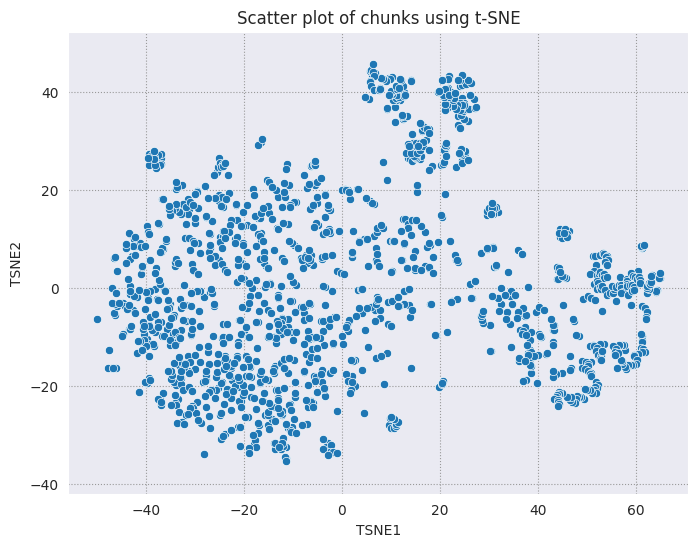

In [72]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data = df_tsne, x = 'TSNE1', y = 'TSNE2')
plt.title("Scatter plot of chunks using t-SNE")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.axis("equal")

### Visualizing Chunks - Color Codeded By Similarity To Prompt

In [73]:
query_embed = np.array(textembed_model.get_embeddings([question])[0].values)
similarity = np.dot(query_embed, chunks_embed_db.T)
df_tsne['similarity'] = similarity.tolist()

(-55.78952350616455, 70.79153385162354, -39.45735874176025, 49.78066577911377)

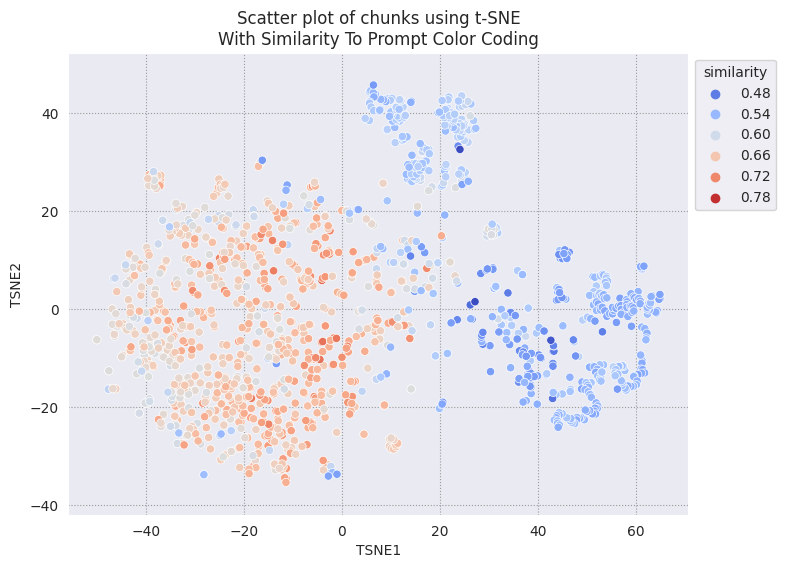

In [74]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data = df_tsne, x = 'TSNE1', y = 'TSNE2', hue = 'similarity', palette = sns.color_palette('coolwarm', as_cmap=True))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Scatter plot of chunks using t-SNE\nWith Similarity To Prompt Color Coding")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.axis("equal")

### Visualizing Chunks - Call Out Matches

In [75]:
matches = chunk_match(question)

In [76]:
df_tsne.iloc[[match[0] for match in matches]]

,TSNE1,TSNE2,similarity
39,10.093793,-2.666891,0.794335
1237,-1.819205,-11.372604,0.753816
64,8.660136,-19.629980,0.741278
46,-4.031733,5.827052,0.740834
194,-7.268339,-27.710226,0.740100
197,-3.863959,-6.651836,0.737095
649,-4.442042,-10.306313,0.736426


(-55.78952350616455, 70.79153385162354, -39.45735874176025, 49.78066577911377)

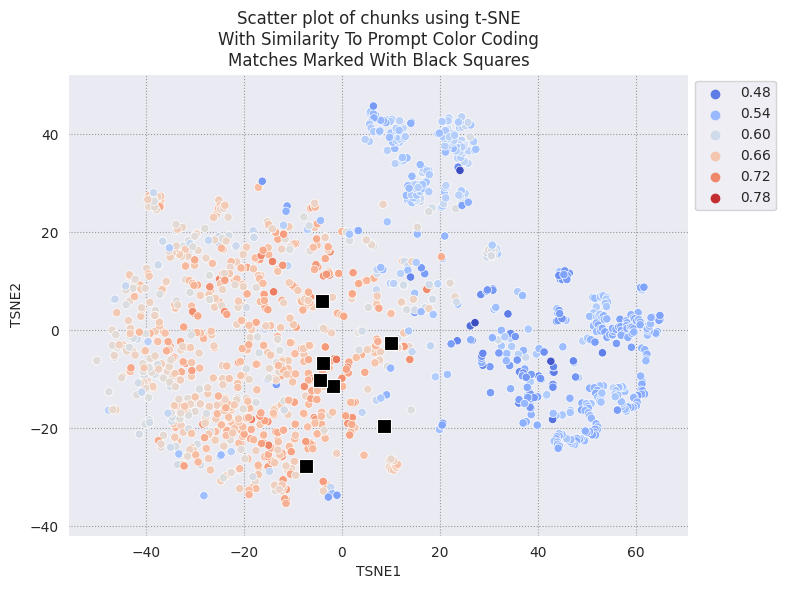

In [77]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data = df_tsne, x = 'TSNE1', y = 'TSNE2', hue = 'similarity', palette = sns.color_palette('coolwarm', as_cmap=True))
sns.scatterplot(data = df_tsne.iloc[[match[0] for match in matches]], x="TSNE1", y="TSNE2", color = 'black', marker = 's', s = 100)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Scatter plot of chunks using t-SNE\nWith Similarity To Prompt Color Coding\nMatches Marked With Black Squares")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.axis("equal")

---
## Review Structure of Objects: `files_pages`, `files_pages_elements`

In [78]:
files_pages[0].keys()

dict_keys(['file_index', 'page_index', 'parsing'])

In [79]:
files_pages[0]['parsing'].keys()

dict_keys(['uri', 'mime_type', 'text', 'pages', 'text_styles', 'entities', 'entity_relations', 'text_changes', 'revisions', 'embedding', 'path', 'file', 'page', 'vme_id', 'dimensions'])

In [80]:
files_pages_chunks[0].keys()

dict_keys(['text', 'metadata', 'embedding'])

In [81]:
files_pages_chunks[0]['metadata'].keys()

dict_keys(['file_index', 'page_index', 'paragraph', 'chunk', 'vme_id', 'vertices', 'normalized_vertices'])

---
## Q&A With DocumentBot

Make a function that receives the users questions and:
- finds and retrieves relative sections of the rules
- prepares a prompt for Vertex AI Generative AI that includes the question and the context = sections of document
- Retrieves the response (answer) from Vertex AI Generative AI
- Retrieves the closest match section of the rules to the response/answer.
- Prepares and presents all the information back to the user

### Functions For Bot

#### Retrieval Functions

These retrieve context.

**NOTE**: `get_retrieval` calls `expand_retrieval` which call `get_retrieval`.  This can lead to infinate recursion but is prevent by `expand_retrieval` calling `get_retrieval` with `DISTANCE` left at default to prevent a further call to `expand_retrieval`.  Max recursion is 1 in this case. 

In [173]:
def get_chunks(query, k = -1, simk = -1):
    # k set the number of matches to retrieve, regarless of similarity. k = -1 will trigger calculating k dynamically.
    # simk sets a threshold for similarity: <=0 uses k, (0,1] will get all matches with similarity in range [1-simk, 1] 
    
    query_embed = np.array(textembed_model.get_embeddings([query])[0].values)
    similarity = np.dot(query_embed, chunks_embed_db.T) # for dot product, higher is better match, since normalized embeddings 1 is best, 0 is worst
    matches = np.argsort(similarity)[::-1].tolist()
    
    if k <= 0:
        # algorithm to dynamically pick k
        k = 1 + 3*int(10*(1-similarity[matches[0]]))
    if simk <= 0:
        matches = [(match, similarity[match]) for match in matches[0:k]]
    elif simk > 0 and simk <= 1:
        indicies = np.where(similarity >= 1-simk)[0]
        matches = [(i, similarity[i]) for i in indicies]
     
    return matches

def expand_retrieval(contexts, DISTANCE):
    
    additional_contexts = []
    if DISTANCE > 0:
        
        # get unique pages:
        pages = list(set([(context[3]['file_index'], context[3]['page_index']) for context in contexts]))
        # add index range of files_pages_chunks for each page:
        for p, page in enumerate(pages):
            low = None
            high = None
            for c, chunk in enumerate(files_pages_chunks):
                if chunk['metadata']['file_index'] == page[0] and chunk['metadata']['page_index'] == page[1]:
                    if not low:
                        low = c
                        high = c
                    else:
                        high = c
            pages[p] = page + (low, high)
        
        # for each page look for surrounding chunks, collect chunks
        chunk_indexes = []
        for context in contexts:
            # get matches for the page from contexts
            matches = get_retrieval(context[2], simk = DISTANCE, file_page = (context[3]['file_index'], context[3]['page_index']))
            for match in matches:
                if match[0] not in chunk_indexes and match[0] not in [c[0] for c in contexts]:
                    chunk_indexes += [match[0] for match in matches]
                    additional_contexts.append(match)

    return additional_contexts

def get_retrieval(question, k = -1, simk = -1, DISTANCE = 0, file_page = None):

    if file_page:
        matches = [match + (files_pages_chunks[match[0]]['text'], files_pages_chunks[match[0]]['metadata']) for match in get_chunks(question, k = k, simk = simk) if file_page == (files_pages_chunks[match[0]]['metadata']['file_index'], files_pages_chunks[match[0]]['metadata']['page_index'])]
    else:
        matches = [match + (files_pages_chunks[match[0]]['text'], files_pages_chunks[match[0]]['metadata']) for match in get_chunks(question, k = k, simk = simk)]
    
    if DISTANCE > 0:
        matches = matches + expand_retrieval(matches, DISTANCE)
    
    return matches

#### Augmentation Functions

This function prepares the prompt by also adding retrieved context = augmenting.

In [174]:
def get_augmented(question, contexts):
    
    prompt = "Give a detailed answer to the question using only the information from the numbered contexts provided below."
    prompt += "\n\nContexts:\n"
    prompt += "\n".join([f'  * Context {c+1}: "{context[2]}"' for c, context in enumerate(contexts)])
    prompt += "\n\nQuestion: " + question
    prompt += "\n\nAnswer the question and give and explanation."
    
    return prompt

#### Generation Functions

These functions interact with LLMs to create responses.

In [175]:
def generate_gemini(prompt, genconfigs, model):
    response = model.generate_content(
        prompt,
        generation_config = vertexai.generative_models.GenerationConfig(
            **genconfigs
            
        )
    )

    try:
        text = response.text
    except Exception:
        text = None

    counter = 0
    while not text:
        genconfigs['temperature'] = .5 - counter*.1
        response = model.generate_content(
            prompt,
            generation_config = vertexai.generative_models.GenerationConfig(
                **genconfigs

            )
        )
        try:
            text = response.text
        except Exception:
            text = None
            counter += 1

        if counter == 6:
            text = 'Please check the prompt, it appears the response is getting blocked.'
    
    return text

def generate_palm(prompt, genconfigs, model):
    response = model.predict(
        prompt,
        **genconfigs
    )
    
    return response.text

def get_generation(prompt, max_output_tokens, model):
    models = dict(GEMINI = gemini_text, PALM_BISON = text_model_b, PALM_BISION32k = text_model_b32, PALM_UNICORN = text_model_u)
    
    genconfigs = dict(max_output_tokens = max_output_tokens)
    
    if model == 'GEMINI':
        response = generate_gemini(prompt, genconfigs, models[model])
    else:
        response = generate_palm(prompt, genconfigs, models[model])
    
    return response

#### Presentation Functions

These prepare the response for presentation - and display the results.

In [239]:
# get a font to use for annotating the page images:
# get font for annotations: get fonts from fonts.google.com
font_source_url = "https://fonts.googleapis.com/css2?family=Roboto+Mono&display=swap"
font_source = requests.get(font_source_url).content.decode("utf-8")
start_url = font_source.find('url(')+4
end_url = font_source.find(')', start_url)
font_url = font_source[start_url:end_url]
font = PIL.ImageFont.truetype(io.BytesIO(requests.get(font_url).content), 35)

def get_presentation(question, contexts, DISTANCE, response, display_contexts, display_annotations):
    # repeat the question
    IPython.display.display(IPython.display.Markdown(f'**The Question:**\n\n{question}\n\n'))
    
    # show the answer
    IPython.display.display(IPython.display.Markdown(f'**The Response:**\n\n{response}\n\n'))
    
    if display_contexts:
    # display the contexts information: page, similarity, hyperlink
        context_pres = '**Sources:**\n\n'
        pages = []
        if DISTANCE > 0:
            context_pres += 'Note: The contexts were expanded to gather additional elements on pages with matched chunks using a similarity distance of {DISTANCE}.\n'
        for context in contexts:
            page = next([d['parsing']['path'], d['parsing']['file'], d['parsing']['page'], d['file_index'], d['page_index']] for d in files_pages if d['file_index'] == context[3]['file_index'] and d['page_index'] == context[3]['page_index'])
            pages.append(page)
            context_pres += f'1. {page[0]}{page[1]}#page={page[2]}\n\t* page: {page[2]}, similarity to question is {context[1]:.3f}\n'
        IPython.display.display(IPython.display.Markdown(context_pres))
        
    if display_annotations:
    # display each page with annotations
        # list of unique pages across contexts: sorted list of tuple(file_index, page_index)
        pages = sorted(list(set([(page[3], page[4]) for page in pages])), key = lambda x: (x[0], x[1]))
        # list of PIL images for each unique page
        images = []
        for page in pages:
            image = next(d['parsing']['pages'][0]['image']['content'] for d in files_pages if d['file_index'] == page[0] and d['page_index'] == page[1])
            images.append(
                PIL.Image.open(
                    io.BytesIO(
                        base64.decodebytes(
                            image.encode('utf-8')
                        )
                    )
                )
            )
        # annotate the contexts:
        
        for image in images:
            IPython.display.display(image.resize(tuple([int(.3*x) for x in image.size])))
    
    

    
    
    
    
    
    return

In [233]:
type(files_pages[0]['parsing']['pages'][0]['image']['content'])

str

In [235]:
image = PIL.Image.open(
    io.BytesIO(
        base64.decodebytes(
            files_pages[0]['parsing']['pages'][0]['image']['content'].encode('utf-8')
        )
    )
)

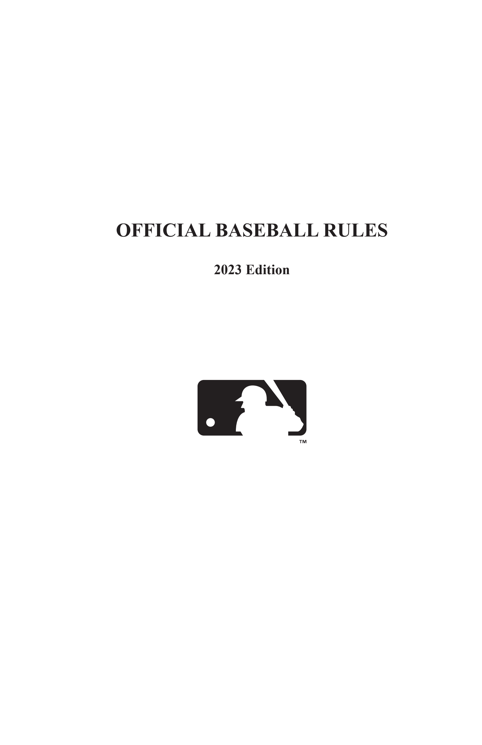

In [238]:
image.resize(tuple([int(.3*x) for x in image.size]))

In [ ]:
def display_unique_files_pages(unique_files_pages, unique_files_pages_images):
    # this function directly references (without input): files_pages
    
    for u, ufp in enumerate(unique_files_pages):
       IPython.display.display(unique_files_pages_images[u].resize(tuple([int(.3*x) for x in files_pages[ufp[0]][ufp[1]]['dimensions']]))) 


In [240]:
def document_bot(question, max_output_tokens = 1000, DISTANCE = 0, MODEL = 'GEMINI', display_contexts = False, display_annotations = False):
    # this function directly references (without input): font
    # DISTANCE = .1 # float in [0, 1], 0 return no additional context, 1 return all on unique pages
    # MODEL = 'GEMINI' # one of: GEMINI, PALM_BISON, PALM_BISON32K, PALM_UNICORN
    
    # R: Retrival
    contexts = get_retrieval(question, DISTANCE = DISTANCE)
    
    # A: Augemented
    prompt = get_augmented(question, contexts)
    
    # G: Generation
    response = get_generation(prompt, max_output_tokens, MODEL)
    
    # Present Answer
    get_presentation(question, contexts, DISTANCE, response, display_contexts, display_annotations)
    
    return prompt

### Try Out Document_Bot:

**The Question:**

How is baseball played?



**The Response:**

According to the provided information, baseball is played between two teams of nine players each on an enclosed field. The offensive team's goal is to have its batter become a runner and its runners advance. The defensive team's goal is to prevent the offensive team from scoring runs.

The game begins with the pitcher delivering the ball to the batter. The batter attempts to hit the ball and become a runner. If the batter hits the ball, the defensive team tries to field the ball and throw it to a base before the batter can reach it. If the batter reaches a base before the ball is thrown, the batter becomes a runner.

The runner tries to advance to the next base by running or being batted in by a teammate. The defensive team tries to prevent the runner from advancing by tagging the runner with the ball or throwing the ball to a base before the runner can reach it.

The game ends when one team has scored more runs than the other team.



**Sources:**

1. https://img.mlbstatic.com/mlb-images/image/upload/mlb/wqn5ah4c3qtivwx3jatm.pdf#page=7
	* page: 7, similarity to question is 0.794
1. https://img.mlbstatic.com/mlb-images/image/upload/mlb/wqn5ah4c3qtivwx3jatm.pdf#page=166
	* page: 166, similarity to question is 0.754
1. https://img.mlbstatic.com/mlb-images/image/upload/mlb/wqn5ah4c3qtivwx3jatm.pdf#page=13
	* page: 13, similarity to question is 0.741
1. https://img.mlbstatic.com/mlb-images/image/upload/mlb/wqn5ah4c3qtivwx3jatm.pdf#page=8
	* page: 8, similarity to question is 0.741
1. https://img.mlbstatic.com/mlb-images/image/upload/mlb/wqn5ah4c3qtivwx3jatm.pdf#page=30
	* page: 30, similarity to question is 0.740
1. https://img.mlbstatic.com/mlb-images/image/upload/mlb/wqn5ah4c3qtivwx3jatm.pdf#page=30
	* page: 30, similarity to question is 0.737
1. https://img.mlbstatic.com/mlb-images/image/upload/mlb/wqn5ah4c3qtivwx3jatm.pdf#page=90
	* page: 90, similarity to question is 0.736


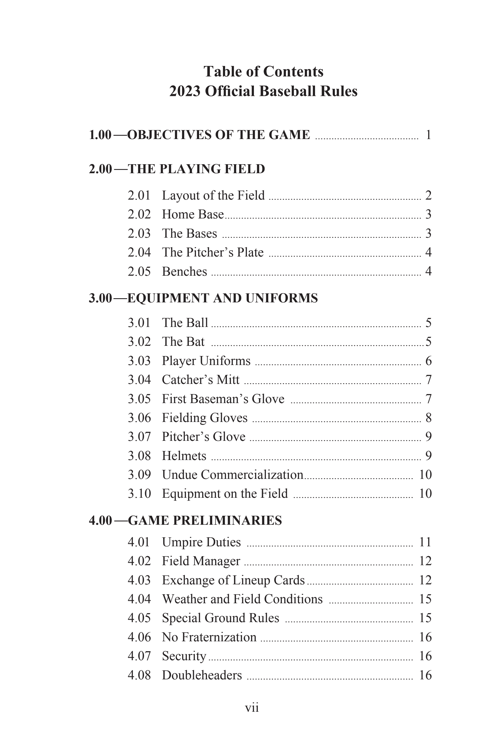

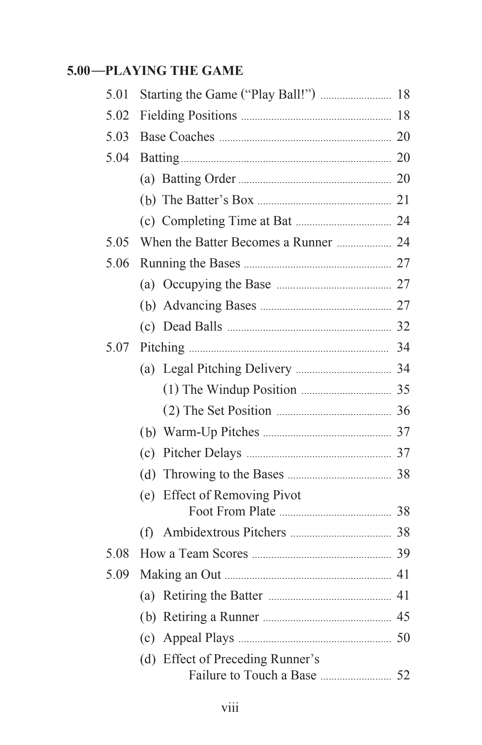

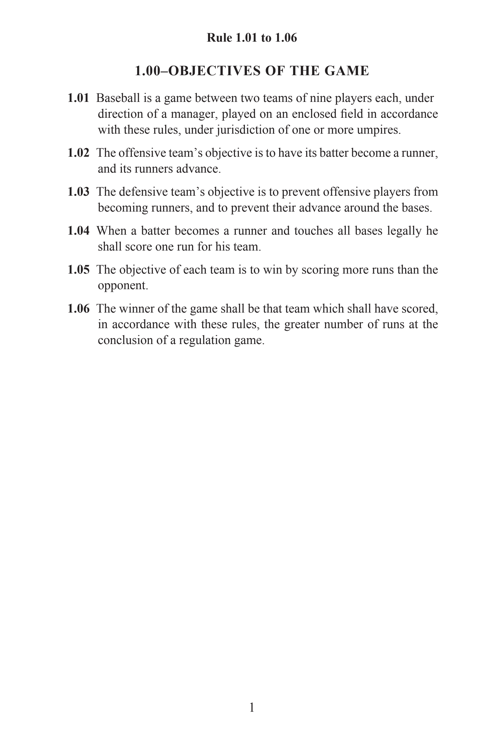

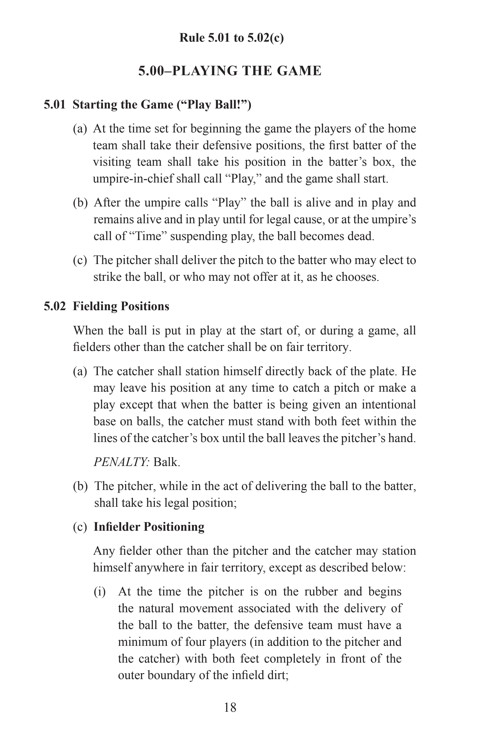

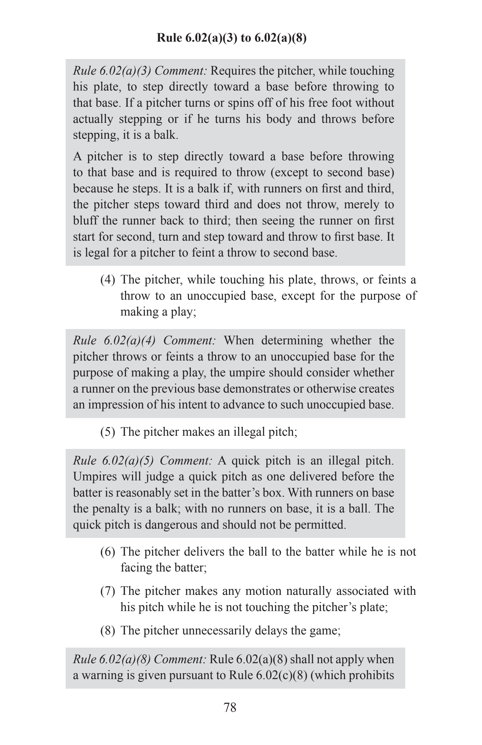

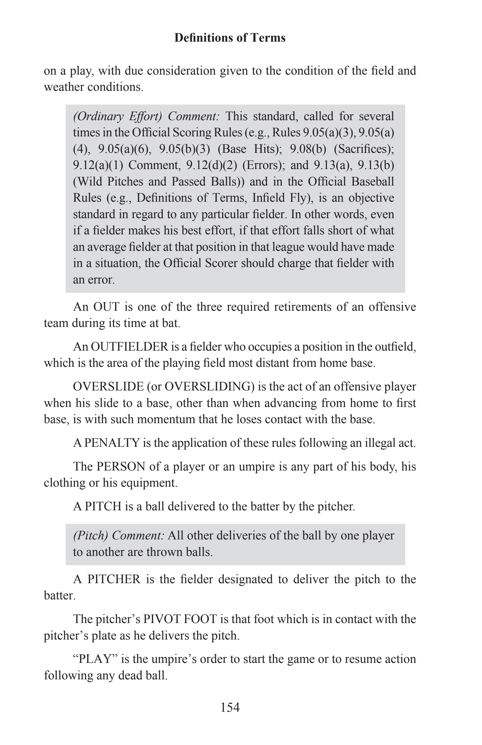

In [241]:
prompt = document_bot(question, display_contexts = True, display_annotations = True)

In [200]:
prompt = document_bot(question, DISTANCE = 1)

**The Question:**

How is baseball played?



**The Response:**

The provided contexts do not explicitly describe how baseball is played, so I cannot answer the question.



In [201]:
prompt = document_bot('Who is the best pitcher for the Dodgers?')

**The Question:**

Who is the best pitcher for the Dodgers?



**The Response:**

The provided contexts do not contain any information about the best pitcher for the Dodgers, so I cannot answer the question from the provided contexts.



In [309]:
question

'How is baseball played?'

In [ ]:
document_bot(question, DISTANCE = 0)

In [ ]:
document_bot("What is the definition of a balk?", DISTANCE = 0.2)

In [ ]:
document_bot("Is a rule broken if three infielders are positioned on the same side of the field where the batter is more likely to hit the ball?", DISTANCE = 0.1)

In [ ]:
document_bot("A batter hits a ball that goes over the fence, but it is caught by a fan in the stands. Is the ball a home run?", DISTANCE = 0)

In [ ]:
document_bot("What is the official size of a base?")